<a href="https://colab.research.google.com/github/EddyGiusepe/Machine_Learning/blob/main/3_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Machine Learning: Regressão</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# Regressão Linear

A tarefa de `REGRESSÃO` consiste em encontrar uma função que nos permita predezir o valor de uma ou mais variáveis a partir de uma ou mais características (ou features). <font color="orange">Um exemplo seria</font> predezir o preço de uma casa a partir de seu número de habitações, metros quadrados, etc. O modelo mais simples para este tipo de tarefa é o modelo de `Regressão Linear`.


$$
  \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n
$$

onde $\hat{y}$ é o valor predito, $w_i$ parâmetros del modelo ou chamados pesos também (aqui também está incluso o `bias` $w_0$), $n$ é o número de características (features) e $x_i$ é a característica $i$. <font color="orange">Este modelo também é conhecido como PERCEPTRON, a base das REDES NEURONAIS</font>. Entrenar um modelo de Regressão Linear consiste em encontrar o conjunto de pesos, $w_i$, que minimizem uma função de CUSTO. Neste caso de regressão linear, o `Erro Quadrático Médio` (MSE) é usado como medida de erro:

$$
  MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2
$$

onde $N$ é o número de amostras em nosso conjunto de Dados, $y^{(i)}$ é o valor real, a etiqueta (ou ground truth) da amostra $j$.   


<font color="yellow">Vejamos um exemplo:</font>

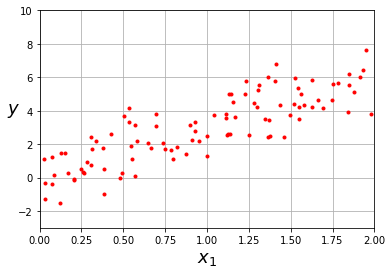

In [6]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -3, 10])
plt.grid(True)
plt.show()

Neste caso temos apenas uma característica, $x_1$, a partir da qual queremos predezir somente uma variável $y$ (<font color="orange">por exemplo o preço de uma casa em função de seus metros quadrados</font>). Podemos usar o modelo de `LinearRegression` da biblioteca `scikit-learn`. 

In [7]:
from sklearn.linear_model import LinearRegression

# Nosso modelo
lin_reg = LinearRegression()
# Ajustamos nosso modelo aos Dados
lin_reg.fit(X, y)

# Calculamos os coeficientes
lin_reg.intercept_, lin_reg.coef_

(array([0.0735255]), array([[2.9843614]]))

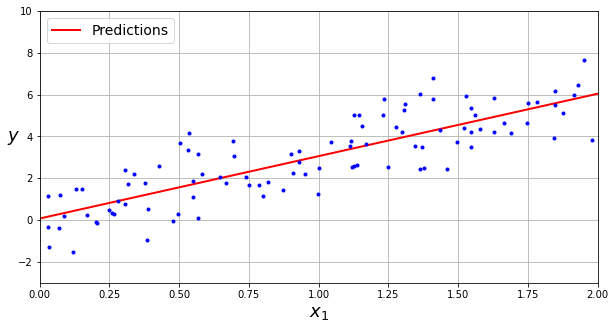

In [10]:
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

plt.figure(figsize=(10, 5))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.grid(True)
plt.axis([0, 2, -3, 10])
plt.show()

Como pode ver, este modelo é muito simples, eficiente e explicável. No entanto, se  nossos Dados no seguem uma tendência linear o resultado que obteremos não será bom.

# Regressão Polinomial

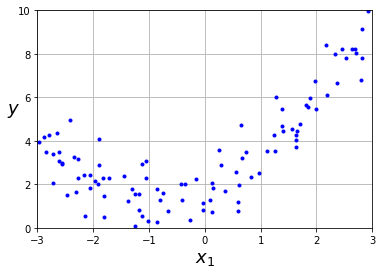

In [12]:
import numpy.random as rnd

np.random.seed(42) # Isto é só para obter os mesmos resultados quando outro cientista reproduzir este script


m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.grid(True)
plt.show()

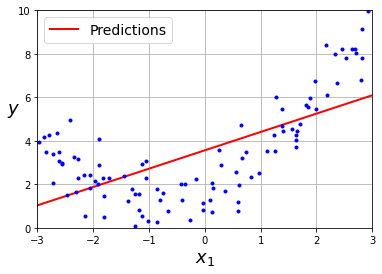

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)


X_new = np.array([[-3], [3]])
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid(True)
plt.show()

Como observamos a RETA não se ajusta aos Dados. Então, para este conjunto de Dados podemos utilizar uma FUNÇÃO POLINOMIAL.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Função polinomial de grau 2 (degree=2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

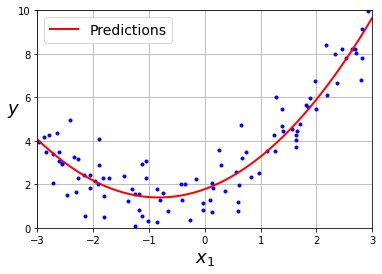

In [20]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.grid(True)
plt.show()